# Sentiment Analysis of Financial News Headlines
## This task tests your ability to apply NLP techniques you've learnt to classify a news headline containing financial information into either one of the sentiments (Positive, Negative or Neutral)

### Dataset:
https://raw.githubusercontent.com/subashgandyer/datasets/main/financial_news_headlines_sentiment.csv

### Steps
- 1. Download the dataset
- 2. Load the dataset
- 3. Explore the dataset (Exploratory Data Analysis)
- 4. Clean the data
- 5. Apply SMOTE for imbalanced data
- 6. Build a BoW model
- 7. Build a Tf-Idf model
- 8. Split train and test data
- 9. Use one ML Classifying algorithm to classify the finanical news headline data
- 10. Use another ML classifying algorithm to classify them
- 11. Plot Confusion matrix 

In [1]:
# !pip3 install imblearn seaborn
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
from nltk.stem.wordnet import WordNetLemmatizer
import string
from imblearn.over_sampling import SMOTE
import heapq
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
import seaborn as sns


## 1. Download the dataset

In [2]:
# !curl https://raw.githubusercontent.com/subashgandyer/datasets/main/financial_news_headlines_sentiment.csv

## 2. Load the dataset

In [3]:
df = pd.read_csv('financial_news_headlines_sentiment.csv',encoding='ISO-8859-1',names=["sentiment","text"])

## 3. Explore the dataset

In [4]:
df.head()

,sentiment,text
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [5]:
df.shape

(4846, 2)

In [6]:
df.sentiment.value_counts()

sentiment
neutral     2879
positive    1363
negative     604
Name: count, dtype: int64

## 4. Clean the data

In [7]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [8]:
for i,j in enumerate(df.text):
    s = j.encode("utf-8").decode()
    s = j.lower()
    s = re.sub(r'won\'t', 'will not',s)
    s = re.sub(r'\'m', ' am', s)
    s = re.sub(r'\'s', ' is', s)
    s = re.sub(r'\'re', ' are', s)
    s = re.sub(r'\'ve', ' have', s)
    s = re.sub(r'\'ll', ' will', s)
    s = re.sub(r'n\'t', ' not', s)
    s = re.sub(r'\W', ' ', s)
    s = re.sub(r'\s+', ' ', s)
    tokenized = word_tokenize(s)
    stopped_tokens = [i for i in tokenized if not i in stop_words]
    lemma_tokens = [lemmatizer.lemmatize(i) for i in stopped_tokens]
    clean_str = ' '.join(lemma_tokens)
    df.text[i] = clean_str

In [9]:
df.head()

,sentiment,text
0,neutral,according gran company plan move production ru...
1,neutral,technopolis plan develop stage area le 100 000...
2,negative,international electronic industry company elco...
3,positive,new production plant company would increase ca...
4,positive,according company updated strategy year 2009 2...


## 6. BoW model

In [10]:
wordfreq = {}
for sent in df.text:

    tokens = nltk.word_tokenize(sent)
    for token in tokens:
        if token not in wordfreq.keys():
            wordfreq[token] = 1
        else:
            wordfreq[token] += 1
    # else:
        # word_freq[token] += 1



In [11]:
wordfreq

{'according': 123,
 'gran': 2,
 'company': 973,
 'plan': 69,
 'move': 23,
 'production': 132,
 'russia': 86,
 'although': 3,
 'growing': 19,
 'technopolis': 17,
 'develop': 16,
 'stage': 11,
 'area': 96,
 'le': 20,
 '100': 45,
 '000': 222,
 'square': 25,
 'meter': 7,
 'order': 138,
 'host': 2,
 'working': 19,
 'computer': 16,
 'technology': 146,
 'telecommunication': 20,
 'statement': 27,
 'said': 545,
 'international': 45,
 'electronic': 22,
 'industry': 107,
 'elcoteq': 39,
 'laid': 10,
 'ten': 15,
 'employee': 90,
 'tallinn': 14,
 'facility': 70,
 'contrary': 1,
 'earlier': 87,
 'layoff': 9,
 'contracted': 4,
 'rank': 2,
 'office': 65,
 'worker': 15,
 'daily': 16,
 'postimees': 1,
 'reported': 53,
 'new': 277,
 'plant': 148,
 'would': 92,
 'increase': 108,
 'capacity': 52,
 'meet': 9,
 'expected': 83,
 'demand': 29,
 'improve': 22,
 'use': 59,
 'raw': 21,
 'material': 48,
 'therefore': 7,
 'profitability': 11,
 'updated': 4,
 'strategy': 38,
 'year': 446,
 '2009': 302,
 '2012': 11,


In [12]:
sent_vector = []
for sent in df.text:
    sentence_tokens = nltk.word_tokenize(sent)
    sent_vec = []
    for token in wordfreq:
        if token in sentence_tokens:
            sent_vec.append(1)
        else:
            sent_vec.append(0)
    sent_vector.append(sent_vec)

In [13]:
sent_vector = np.asarray(sent_vector)

In [14]:
pd.DataFrame(sent_vector,columns=wordfreq)

,according,gran,company,plan,move,production,russia,although,growing,technopolis,...,hs,029,813,newsroom,keywords,surprise,overshadowed,rebound,broader,221
0,1,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4841,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4842,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4843,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4844,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## 7. Tf-idf model

In [15]:
tfidf = TfidfVectorizer(stop_words='english')

In [16]:
corpus = df.text
transformed_data = tfidf.fit_transform(corpus)

In [17]:
dense_matrix = transformed_data.todense()

In [18]:
tfidf.get_feature_names_out()

array(['00', '000', '000063', ..., 'æskyl', 'ætehuolto', 'ðl'],
      dtype=object)

In [19]:
len(dense_matrix)

4846

## 8. Split train test data

In [20]:
Xtrain,Xtest,ytrain,ytest = train_test_split(dense_matrix,df.sentiment,stratify=df.sentiment)

## 5. SMOTE (Imbalanced dataset)
Hint: Use **imblearn** library

In [21]:
smote = SMOTE(random_state=23)

In [22]:
X_resampled,y_resampled = smote.fit_resample(np.asarray(Xtrain),ytrain)

In [23]:
X_resampled.shape,y_resampled.shape

((6477, 8974), (6477,))

In [24]:
y_resampled.value_counts()

sentiment
positive    2159
neutral     2159
negative    2159
Name: count, dtype: int64

## 9. Classification Algorithm [10 points]
- Train
- Predict

In [25]:
rf = RandomForestClassifier()

In [26]:
rf.fit(X_resampled,y_resampled)

RandomForestClassifier()

In [27]:
rf_pred = rf.predict(np.asarray(Xtest))

In [28]:
print(classification_report(ytest,rf_pred))

              precision    recall  f1-score   support

    negative       0.80      0.56      0.66       151
     neutral       0.76      0.93      0.83       720
    positive       0.72      0.47      0.57       341

    accuracy                           0.75      1212
   macro avg       0.76      0.65      0.69      1212
weighted avg       0.75      0.75      0.74      1212



## 10. Another Classification Algorithm [10 points]
- Train
- Predict

In [29]:
nb = MultinomialNB()

In [30]:
nb.fit(X_resampled,y_resampled)

MultinomialNB()

In [31]:
pred = nb.predict(np.asarray(Xtest))

In [32]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

    negative       0.43      0.79      0.56       151
     neutral       0.82      0.70      0.75       720
    positive       0.53      0.50      0.52       341

    accuracy                           0.65      1212
   macro avg       0.59      0.66      0.61      1212
weighted avg       0.69      0.65      0.66      1212



## 11. Confusion Matrixes for two classification algorithms and two feature extractor methods [10 points]

In [33]:
ytest.unique()

array(['neutral', 'negative', 'positive'], dtype=object)

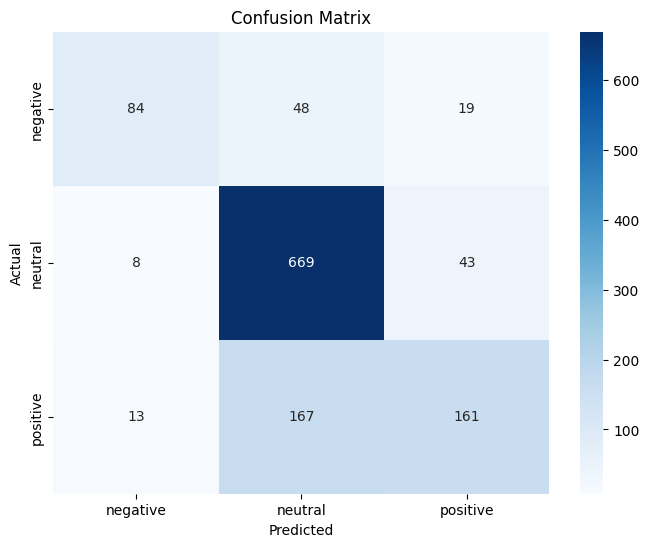

In [34]:
conf_matrix = confusion_matrix(ytest, rf_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

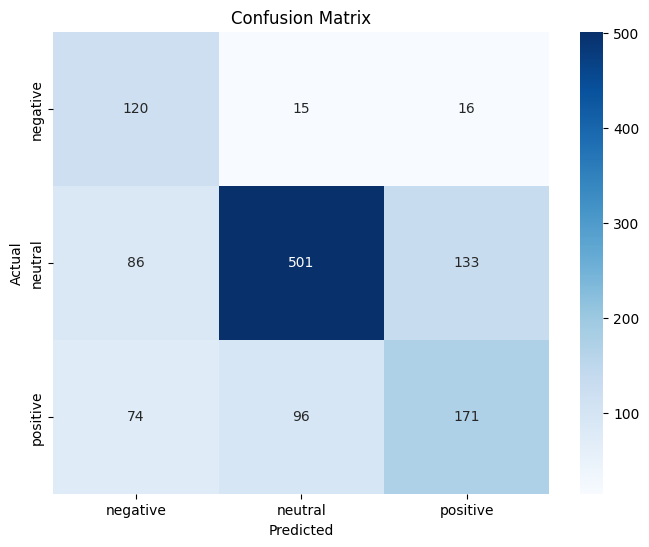

In [35]:
conf_matrix = confusion_matrix(ytest, pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()